В качестве исходных данных были взяты результаты экспериментальных
исследований, проводимых в целях улучшения технологического процесса
электронно-лучевой сварки изделия, сборка которого состоит из элементов,
состоящих из разнородного материала.
Установка электронно-лучевой сварки, на которой проводились
исследования, предназначена для сварки электронным лучом в глубоком вакууме
деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых
и специальных сплавов.
Существующая установка электронно-лучевой сварки обеспечивает
повторяемость режимов в рамках возможностей реализованной системы
управления. Работы по сварке выполнялись на образцах-имитаторах,
соответствующих технологическому изделию.
Для уменьшения вложения энергии при сварке:
1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической
системы (FP).
По совокупности параметров технологических режимов обеспечивались
минимально возможные размеры сварных швов: глубина шва (Depth) и ширина
шва (Width).
В процессе выполнения работ была произведена электронно-лучевая сварка
18-ти единиц образцов. Результаты металлографического контроля
по размерам сварного шва для каждого образца проводились в 4-х поперечных
сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне
19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки,
размеров сварочных швов в поперечных сечениях всех образцов

Импортируем библиотеки для работы с данными

In [ ]:
import pandas as pd #для данных, и обработки данных
import numpy as np #для массивов данных
import matplotlib.pyplot as plt #для графиков
import seaborn as sns #тепловая
import sklearn #для машшиного обучения
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer #для стандатртизации/масштабирования
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #для ошибок/коэф детерминации
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate #тест, валидация
from sklearn.neighbors import KNeighborsRegressor #к ближайших
from sklearn.linear_model import LinearRegression #линейная
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #случайный лес/градиент






смотрим датасет

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/OlesyaSilnyagina/-/refs/heads/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82-%D0%BA-%D0%BA%D0%B5%D0%B9%D1%81%D1%83-1/ebw_data.csv')
df1

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


Описание




In [ ]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [ ]:
df1.isnull().sum() #пропуски

,0
IW,0
IF,0
VW,0
FP,0
Depth,0
Width,0


Разведочный

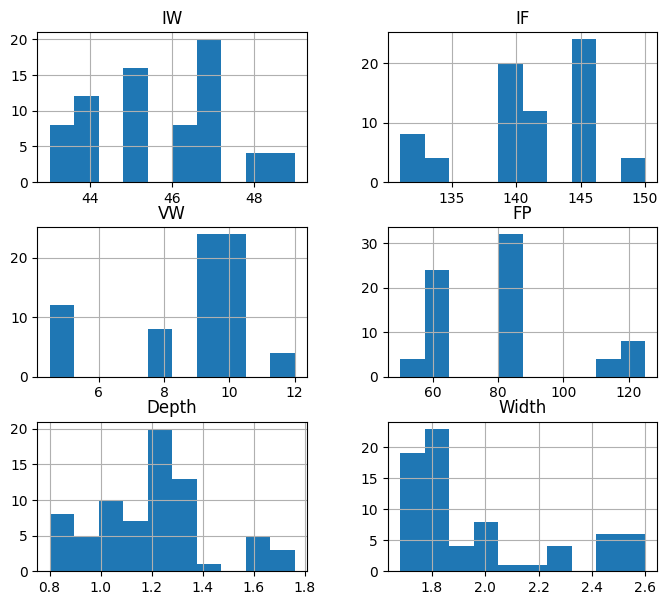

<Axes: >

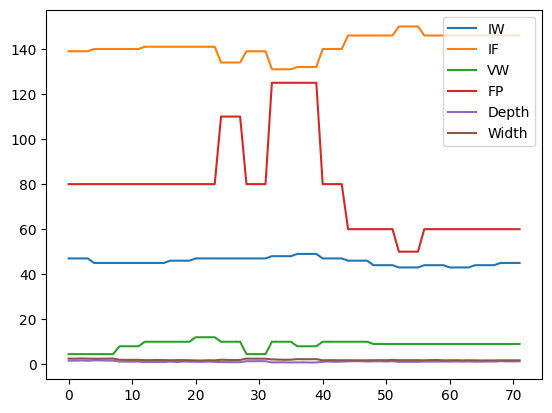

In [ ]:
#визуализация распределения и линейный
df1.hist(figsize=(8, 7))
plt.show()
df1.plot.line()

<function matplotlib.pyplot.show(close=None, block=None)>

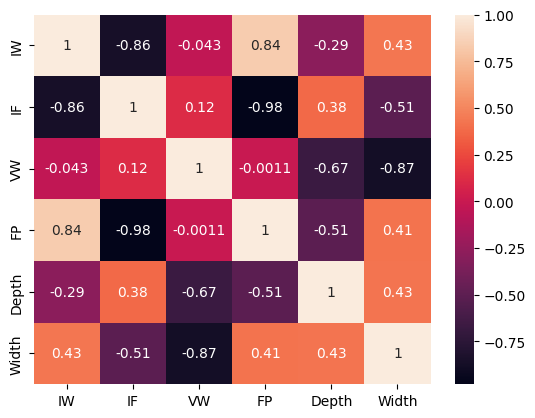

In [ ]:
#корреляция
sns.heatmap(df1.corr(), annot=True)
plt.show

<Axes: ylabel='Density'>

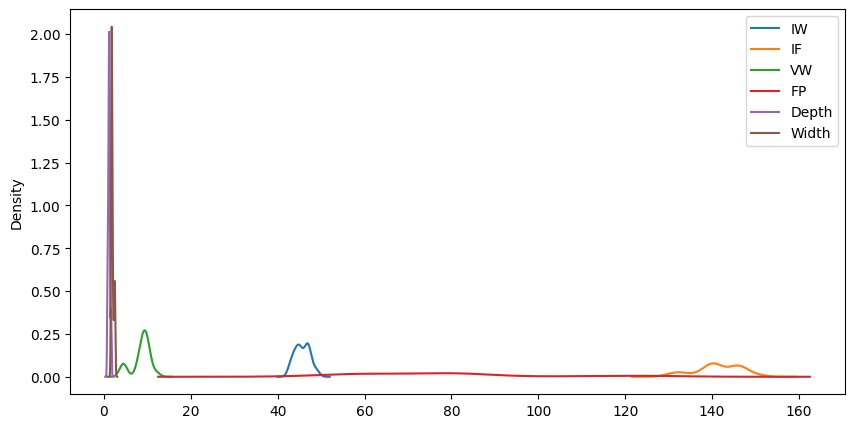

In [ ]:
#выбросы
fig, ax=plt.subplots(figsize=(10,5))
df1.plot(kind='kde',ax=ax)
#Depth Width

In [ ]:
#нормализация числовых
scaler = StandardScaler()
scalerdf1=scaler.fit_transform(df1[['IW','IF','VW','FP']])
scalerdf1

array([[ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [ 0.8       , -0.45662965, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -2.02221044,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.26093123, -0.31215329,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [-0.4       , -0.06523281,  0.66502222,  0.07808688],
       [ 0.2       , -0.

Предобработка

In [ ]:
x=df1 [['IW','IF','VW','FP']]
y_depth=df1['Depth']
y_width=df1['Width']
x.shape, y_width.shape, y_depth.shape



((72, 4), (72,), (72,))

тест/обучение

In [ ]:
x_train, x_test,y_depth_train, y_depth_test = train_test_split (x, y_depth, test_size=0.2, random_state=42)
x_train, x_test, y_width_train, y_width_test = train_test_split (x, y_width, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_depth_train.shape, y_depth_test.shape

((57, 4), (15, 4), (57,), (15,))

In [ ]:
x_train.shape, x_test.shape, y_width_train.shape, y_width_test.shape

((57, 4), (15, 4), (57,), (15,))

стандартизация

In [ ]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train


array([[ 0.74265882, -0.04987216,  1.65415353,  0.04321141],
       [-0.99699403,  0.89769886,  0.06057464, -0.85244335],
       [-0.99699403,  0.89769886,  0.06057464, -0.85244335],
       [ 1.32254311, -1.94501419,  0.5917676 ,  2.05843464],
       [ 1.90242739, -1.75549998, -0.47061833,  2.05843464],
       [-0.99699403,  0.89769886,  0.06057464, -0.85244335],
       [ 0.16277454, -0.04987216,  0.5917676 ,  0.04321141],
       [ 1.32254311, -1.94501419,  0.5917676 ,  2.05843464],
       [ 0.16277454,  0.89769886,  0.5917676 , -0.85244335],
       [-0.41710975,  0.89769886,  0.06057464, -0.85244335],
       [-0.41710975, -0.23938636, -2.3297937 ,  0.04321141],
       [-1.57687832,  1.65575567,  0.06057464, -1.30027074],
       [ 0.74265882, -0.23938636,  0.5917676 ,  0.04321141],
       [ 0.74265882, -0.42890056, -2.3297937 ,  0.04321141],
       [ 0.16277454,  0.89769886,  0.5917676 , -0.85244335],
       [-0.41710975,  0.89769886,  0.06057464, -0.85244335],
       [ 0.16277454, -0.

In [ ]:
x_test

array([[-0.33145961, -0.36288737, -1.36118872,  0.25764051],
       [-1.75200078,  0.99794027,  0.55298292, -0.93146954],
       [ 0.37881098, -0.13608276,  0.97835439,  0.25764051],
       [ 1.08908156, -0.58969198, -1.36118872,  0.25764051],
       [ 1.08908156, -0.58969198, -1.36118872,  0.25764051],
       [-1.04173019,  0.99794027,  0.55298292, -0.93146954],
       [-0.33145961, -0.36288737,  0.12761144,  0.25764051],
       [ 1.79935215, -2.40412882,  0.97835439,  2.93313813],
       [-0.33145961, -0.13608276,  0.97835439,  0.25764051],
       [-1.75200078,  1.90515869,  0.55298292, -1.52602457],
       [ 0.37881098,  0.99794027,  0.97835439, -0.93146954],
       [ 1.08908156, -0.58969198, -1.36118872,  0.25764051],
       [-0.33145961, -0.36288737,  0.12761144,  0.25764051],
       [ 0.37881098,  0.99794027,  0.97835439, -0.93146954],
       [-0.33145961, -0.36288737, -1.36118872,  0.25764051]])

ML model

KNN


In [ ]:
knn_depth= KNeighborsRegressor (n_neighbors=3)
knn_width = KNeighborsRegressor (n_neighbors=3)


In [ ]:
knn_depth


KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_width

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#knn обучение
knn_depth.fit(x_train, y_depth_train)
knn_width.fit (x_train, y_width_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#knn прогноз
y_depth_predknn = knn_depth.predict(x_test)
y_width_predknn = knn_width.predict(x_test)

In [ ]:
y_width_predknn

array([2.17333333, 1.78      , 1.80666667, 2.49333333, 2.49333333,
       1.78666667, 1.86666667, 2.09333333, 1.86666667, 1.81333333,
       1.77333333, 2.49333333, 1.86666667, 1.77333333, 2.17333333])

In [ ]:
y_depth_predknn

array([1.34666667, 1.22666667, 1.12      , 1.44666667, 1.44666667,
       1.24      , 1.02      , 0.83333333, 1.02      , 1.08      ,
       1.30666667, 1.44666667, 1.02      , 1.30666667, 1.34666667])

knnоценка

In [ ]:
#средняя абсолютная ошибка
knn_depth_mae = mean_absolute_error(y_depth_test, y_depth_predknn)
knn_width_mae = mean_absolute_error(y_width_test, y_width_predknn)



In [ ]:
knn_depth_mae

0.1164444444444444

In [ ]:
knn_width_mae

0.07777777777777774

In [ ]:
#RMSE
knn_depth_rmse= mean_squared_error(y_depth_test, y_depth_predknn, squared=False)
knn_width_rmse=mean_squared_error (y_width_test, y_width_predknn, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
knn_depth_rmse

0.16711938513795724

In [ ]:
knn_width_rmse

0.12248053511265156

In [ ]:
#коэф детерминации
knn_depth_r2 = r2_score(y_depth_test, y_depth_predknn)
knn_width_r2 = r2_score(y_width_test, y_width_predknn)

In [ ]:
knn_depth_r2

0.5190718177922

In [ ]:
knn_width_r2

0.8503417045024594

In [ ]:
print(f"KNN(depth)-MAE:{knn_depth_mae:.2f}, RMSE:{knn_depth_rmse:.2f}, R2:{knn_depth_r2:.2f}")
print(f"KNN(width)-MAE:{knn_width_mae:.2f}, RMSE:{knn_width_rmse:.2f}, R2:{knn_width_r2:.2f}")

KNN(depth)-MAE:0.12, RMSE:0.17, R2:0.52
KNN(width)-MAE:0.08, RMSE:0.12, R2:0.85


random forest


In [ ]:
RF_depth = RandomForestRegressor (n_estimators=100,random_state=42 )
RF_width = RandomForestRegressor (n_estimators=100, random_state=42)

In [ ]:
RF_depth

RandomForestRegressor(random_state=42)

In [ ]:
RF_width

RandomForestRegressor(random_state=42)

In [ ]:
#rf обучение
RF_depth.fit(x_train,y_depth_train)
RF_width.fit(x_train, y_width_train)

RandomForestRegressor(random_state=42)

In [ ]:
#прогноз
y_depth_predRF = RF_depth.predict(x_test)
y_width_predRF  =RF_width.predict(x_test)

In [ ]:
y_depth_predRF

array([1.2350581 , 1.20373476, 1.11951619, 1.223665  , 1.223665  ,
       1.21037828, 1.17183143, 0.82891262, 1.02549095, 1.07664333,
       1.29318952, 1.223665  , 1.17183143, 1.29318952, 1.2350581 ])

In [ ]:
y_width_predRF

array([2.04133333, 1.79284206, 1.8059381 , 2.09321651, 2.09321651,
       1.81087597, 1.84122238, 2.0946946 , 1.86092333, 1.81661095,
       1.77989524, 2.09321651, 1.84122238, 1.77989524, 2.04133333])

оценка RF


In [ ]:
#MAe
RF_depth_mae = mean_absolute_error (y_depth_test, y_depth_predRF)
RF_width_mae = mean_absolute_error (y_width_test, y_width_predRF)

In [ ]:
RF_depth_mae

0.1355109398705867

In [ ]:
RF_width_mae

0.17812109654833191

In [ ]:
#rmse
RF_depth_rmse = mean_squared_error (y_depth_test, y_depth_predRF, squared= False )
RF_width_rmse = mean_squared_error (y_width_test, y_width_predRF, squared= False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
RF_depth_rmse

0.21753482785566391

In [ ]:
RF_width_rmse

0.253375763770064

In [ ]:
#r2
RF_depth_r2 = r2_score (y_depth_test, y_depth_predRF)
RF_width_r2 = r2_score (y_width_test, y_width_predRF)

In [ ]:
RF_depth_r2

0.18513781154001874

In [ ]:
RF_width_r2

0.35953295815904174

In [ ]:
print(f"RF(depth)-MAE:{RF_depth_mae:.2f}, RMSE:{RF_depth_rmse:.2f}, R2:{RF_depth_r2:.2f}")
print(f"RF(width)-MAE:{RF_width_mae:.2f}, RMSE:{RF_width_rmse:.2f}, R2:{RF_width_r2:.2f}")

RF(depth)-MAE:0.14, RMSE:0.22, R2:0.19
RF(width)-MAE:0.18, RMSE:0.25, R2:0.36


Результаты

RF(depth)-MAE:0.14, RMSE:0.22, R2:0.19

RF(width)-MAE:0.18, RMSE:0.25, R2:0.36


KNN(depth)-MAE:0.12, RMSE:0.17, R2:0.52

KNN(width)-MAE:0.08, RMSE:0.12, R2:0.85





              MAE  RMSE    R2
Model                        
RF (Depth)   0.14  0.22  0.19
RF (Width)   0.18  0.25  0.36
KNN (Depth)  0.12  0.17  0.52
KNN (Width)  0.08  0.12  0.85


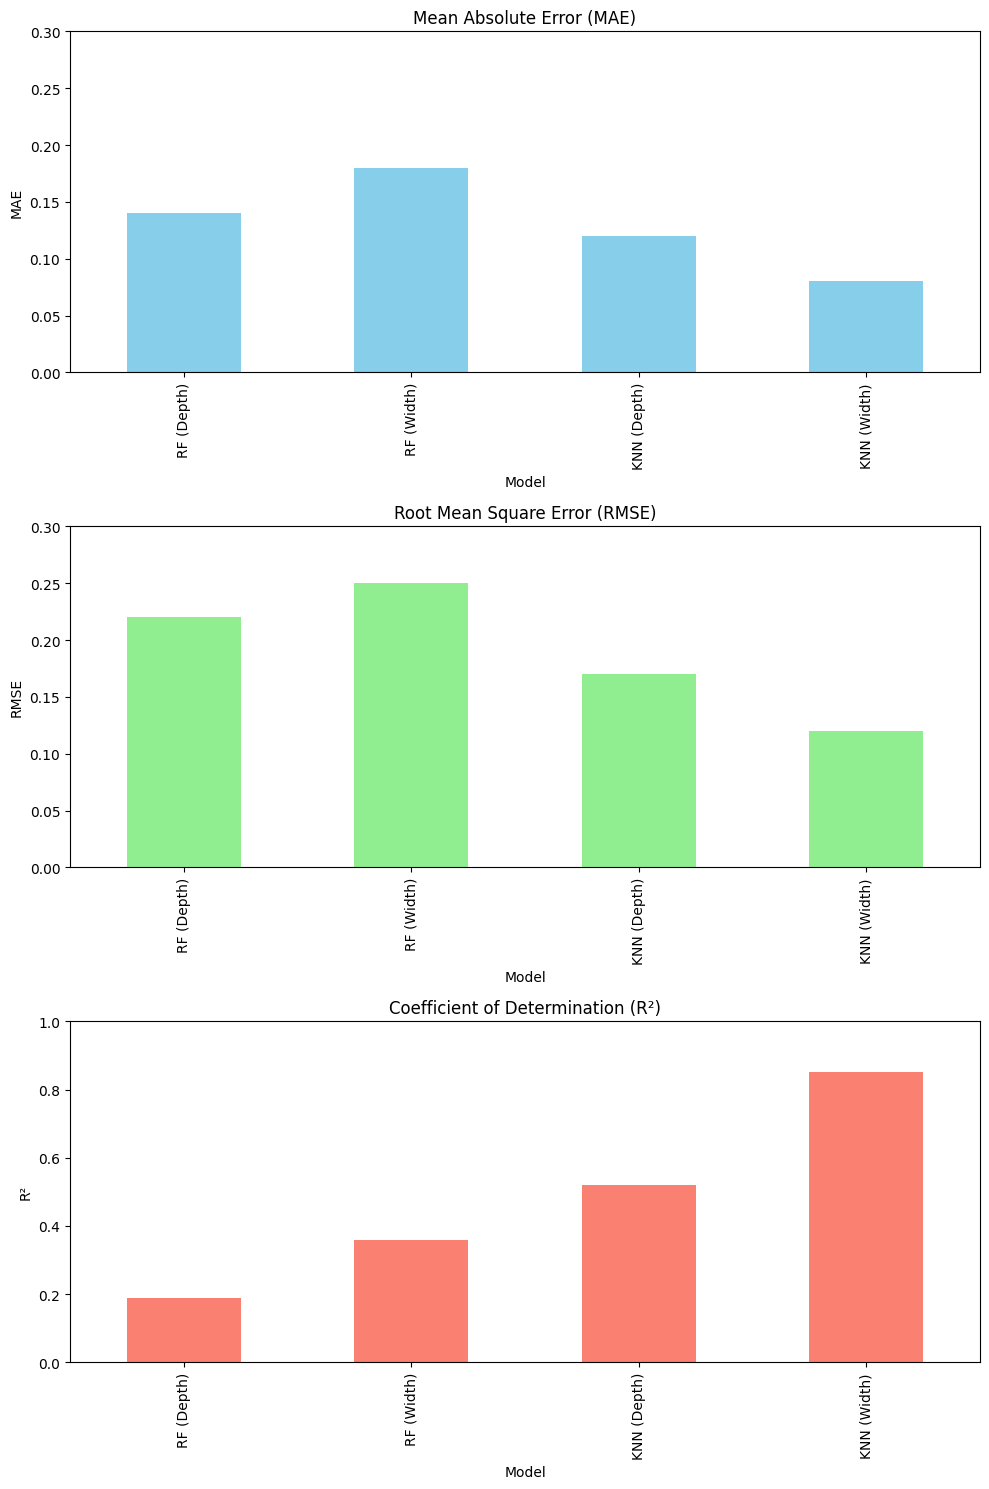

In [132]:
data = {
    'Model': ['RF (Depth)', 'RF (Width)', 'KNN (Depth)', 'KNN (Width)'],
    'MAE': [0.14, 0.18, 0.12, 0.08],
    'RMSE': [0.22, 0.25, 0.17, 0.12],
    'R2': [0.19, 0.36, 0.52, 0.85]
}


df = pd.DataFrame(data)


df.set_index('Model', inplace=True)


print(df)
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Столбчатая диаграмма для MAE
df['MAE'].plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')
ax[0].set_ylim(0, 0.3)

# Столбчатая диаграмма для RMSE
df['RMSE'].plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Root Mean Square Error (RMSE)')
ax[1].set_ylabel('RMSE')
ax[1].set_ylim(0, 0.3)

# Столбчатая диаграмма для r2
df['R2'].plot(kind='bar', ax=ax[2], color='salmon')
ax[2].set_title('Coefficient of Determination (R²)')
ax[2].set_ylabel('R²')
ax[2].set_ylim(0, 1)


plt.tight_layout()
plt.show()
